In [2]:
!pip install nltk


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import vstack
import re
import nltk

nltk.download()



NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [4]:
from nltk.corpus import stopwords

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn import metrics
import matplotlib.pyplot as plt




In [11]:
figures_db = pd.read_csv(r"figures.csv")


In [12]:
figures_db.drop('createdAt', axis=1, inplace=True)
figures_db.drop('nichoId', axis=1, inplace=True)
figures_db.drop('nichoName', axis=1, inplace=True)
figures_db.drop('path', axis=1, inplace=True)
figures_db.drop('lastmodified', axis=1, inplace=True)
figures_db.drop('objectID', axis=1, inplace=True)







Digite o nome do item (Digite 'end' para encerrar o programa): 19. curso nail designer
Desculpe! Item não encontrado no banco de dados! Tente outro item!
Digite o nome do item (Digite 'end' para encerrar o programa): 19. curso nail designer
Desculpe! Item não encontrado no banco de dados! Tente outro item!
Digite o nome do item (Digite 'end' para encerrar o programa): 46. unhas da semana
[0.        0.        0.3643145 0.3643145 0.3643145]


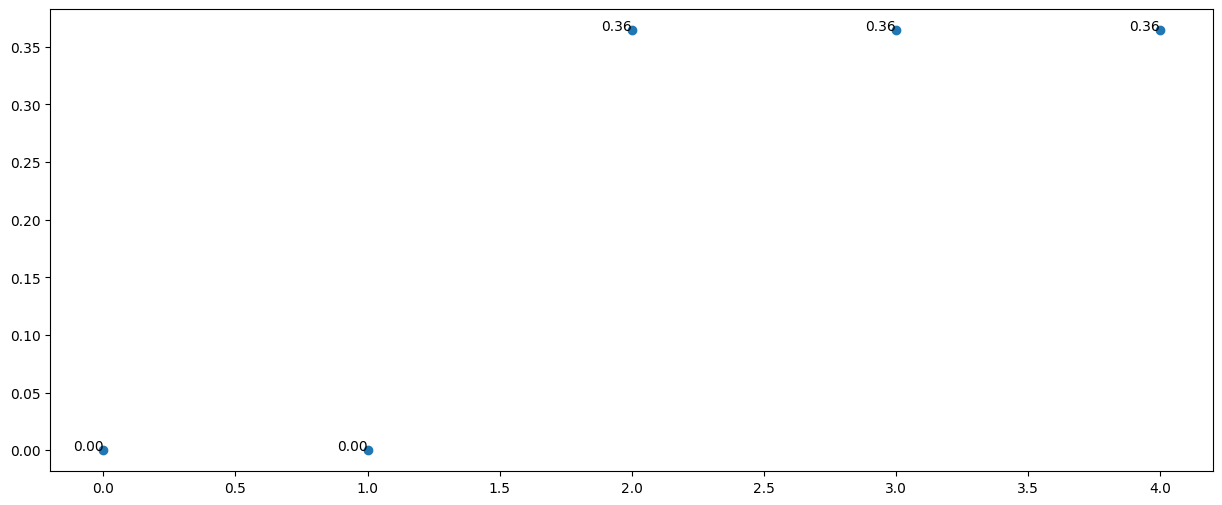


 As seguintes são as melhores recomendações para '46. unhas da semana':

['https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F5.%20Unhas%2F47.%20unhas%20da%20semana.png?alt=media&token=6ee25ff1-3d20-4965-9e2f-8d3e6e71d8ec', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F5.%20Unhas%2F46.%20unhas%20da%20semana.png?alt=media&token=94a85178-c811-42b9-ae9f-1cf7aaa4b1dd', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F5.%20Unhas%2F54.%20unhas%20.png?alt=media&token=74cbc32c-c574-4dbf-aab8-2077564f1325', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F5.%20Unhas%2F56.%20unhas%20unhas%20.png?alt=media&token=eda7a2dd-7fbe-4b18-82e9-ec791769986a', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F5.%20Unhas%2F55.%20unhas%20.png?alt=media&token=b129b39d-0ad8-4d6f-a01d-937c47a67db0']


Digite o nome do item (Digite 'end' pa

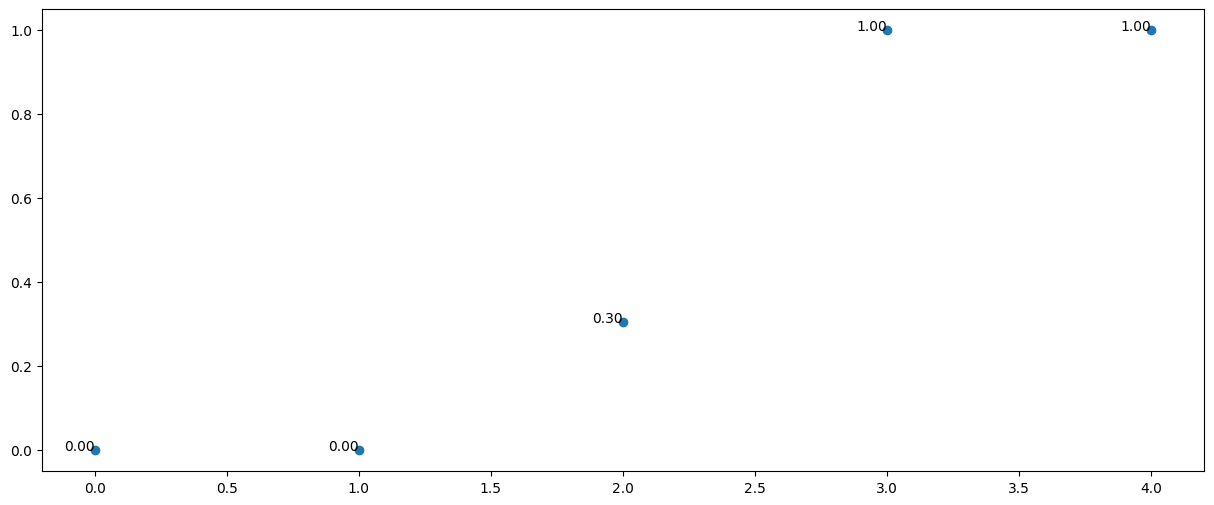


 As seguintes são as melhores recomendações para '56. Formandas':

['https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F2.%20Maquiagem%2F44.%20Formandas.png?alt=media&token=3ffb91a3-6cdc-480c-85d1-b40437b706dd', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F2.%20Maquiagem%2F56.%20Formandas.png?alt=media&token=15a5e345-a00a-4edd-8e54-09e8fcf321a5', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F2.%20Maquiagem%2F27.%20Pacote%20de%20formandas.png?alt=media&token=15c4f690-6bbd-4fa8-a378-8e9019c6cb72', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2FRea%C3%A7%C3%B5es%2FRea%C3%A7%C3%A3o%207.png?alt=media&token=78a69f47-954d-4085-8ca0-f861a610e78b', 'https://firebasestorage.googleapis.com/v0/b/hl-academy-6c1e3.appspot.com/o/nicho%2F1.%20Inspiradoras%20%2F62.%20On%20no%20off.png?alt=media&token=2b75c3ee-4e7a-4156-84a1-c9a2409ed5eb']


Digite o nome do 

In [14]:
def preprocess_text(figure_name):
    # Converter para minúsculas
    figure_name = str(figure_name).lower()
    # Remover caracteres que não são letras ou espaços
    figure_name = re.sub('[^a-z\s]', '', figure_name)
    return figure_name


figures_db['nameAfterPreProcess'] = figures_db['name'].apply(preprocess_text)

vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
tfidf_matrix = vectorizer.fit_transform(figures_db['nameAfterPreProcess'])

n_neighbors = 6  # Number of neighbors to return, including the input book
model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine', algorithm='auto')
model.fit(tfidf_matrix)


# Create a mapping from book titles to their index
title_to_index = pd.Series(figures_db.index, index=figures_db['name'].apply(lambda x: x.lower()))

def recommend_images(title, model=model, figures_db=figures_db, title_to_index=title_to_index):
    idx = title_to_index[title.lower()]
    distances, indices = model.kneighbors(tfidf_matrix[idx])
    indices = indices[0][1:]  # Remove o item de entrada das recomendações
    distances = distances[0][1:]
    print(distances)




    # Criando o gráfico de dispersão
    fig, ax = plt.subplots(ncols=1, figsize=(15,6))
    ax.scatter(list(range(len(distances))), distances)

    # Adicionando as distâncias explicitamente
    for i, txt in enumerate(distances):
      ax.text(i, distances[i], f'{txt:.2f}', ha='right')

    plt.show()



    return figures_db['img'].iloc[indices].values.tolist()




def main():
    while True:
        figure_name = input("Digite o nome do item (Digite 'end' para encerrar o programa): ")
        if figure_name.lower() == 'end':
            break
        if figure_name.lower() not in title_to_index:
            print("Desculpe! Item não encontrado no banco de dados! Tente outro item!")
            continue

        recommendations = recommend_images(figure_name)
        print("\n As seguintes são as melhores recomendações para '{}':\n".format(figure_name))
        print(recommendations)
        print("\n")





if __name__ == "__main__":
    main()


<1531x1531 sparse matrix of type '<class 'numpy.float64'>'
	with 9186 stored elements in Compressed Sparse Row format>